In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Load the dataset

In [2]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()


170508288/170498071 [==============================] - 117s 1us/step


(50000, 32, 32, 3)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape


(10000, 32, 32, 3)

In [8]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
Y_train=Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

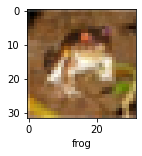

In [13]:
plot_sample(X_train,Y_train,0)

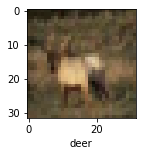

In [14]:
plot_sample(X_train,Y_train,3)

## Normalizing the training data

In [15]:
X_train=X_train/255
X_test=X_test/255

## Build simple artificial neural network for image classification

In [17]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 65s 38ms/step - loss: 1.8111 - accuracy: 0.3526
Epoch 2/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.6187 - accuracy: 0.4291
Epoch 3/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5379 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4768 - accuracy: 0.4819
Epoch 5/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4289 - accuracy: 0.4979


In [19]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.62      0.52      1000
           1       0.71      0.48      0.57      1000
           2       0.39      0.33      0.36      1000
           3       0.36      0.28      0.31      1000
           4       0.38      0.46      0.42      1000
           5       0.37      0.39      0.38      1000
           6       0.44      0.68      0.54      1000
           7       0.73      0.34      0.46      1000
           8       0.51      0.70      0.59      1000
           9       0.64      0.43      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



## Now let us build a convolutional neural network to train our images

In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4823 - accuracy: 0.4640
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1295 - accuracy: 0.6021
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9983 - accuracy: 0.6529
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9148 - accuracy: 0.6815
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8509 - accuracy: 0.7054
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7929 - accuracy: 0.7250
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7454 - accuracy: 0.7408
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6999 - accuracy: 0.7549
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6560 - accuracy: 0.7727
Epoch 10/10
1563/1563 [==============================] - 34s 22m

In [25]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9656 - accuracy: 0.6846


[0.9655865430831909, 0.6845999956130981]

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.04326874e-01, 1.15085961e-02, 2.14546341e-02, 4.16248292e-01,
        5.94920675e-05, 9.95144472e-02, 1.44754022e-01, 4.83159063e-04,
        1.50217786e-01, 5.14326654e-02],
       [3.25861806e-03, 1.48145780e-01, 2.49555160e-06, 2.27495116e-06,
        7.67617436e-08, 5.41153211e-09, 4.16676221e-06, 3.97926747e-10,
        8.45486045e-01, 3.10057518e-03],
       [1.57572955e-01, 2.00997218e-01, 1.60912052e-03, 1.07217422e-02,
        7.34025904e-04, 6.91410445e-04, 7.34922476e-04, 4.26213723e-04,
        6.21283352e-01, 5.22904936e-03],
       [9.08828974e-01, 6.23719990e-02, 2.09513726e-03, 9.69835382e-04,
        9.68512788e-04, 6.52395784e-06, 5.61299559e-04, 6.01806503e-04,
        2.22429484e-02, 1.35303510e-03],
       [2.37768495e-06, 7.95764151e-07, 5.11950627e-03, 9.93950013e-03,
        5.74428856e-01, 1.39316963e-03, 4.09086585e-01, 1.28284216e-06,
        2.72229991e-05, 6.57726559e-07]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [28]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [31]:
classes[y_classes[2]]

'ship'